In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Data Loading

In [2]:
dftrain = pd.read_csv("mnist_train.csv")

dftest = pd.read_csv("mnist_test.csv")

In [3]:
dftrain.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dftrain.shape

(60000, 785)

In [5]:
dftest.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dftest.shape

(10000, 785)

### Checking Any Null Values or Duplicate Values

In [7]:
dftrain.isnull().sum().sum()

0

In [8]:
dftest.isnull().sum().sum()

0

In [9]:
duplicate_rows = dftrain[dftrain.duplicated()]
print('Number of duplicate Samples : ',len(duplicate_rows))


Number of duplicate Samples :  0


In [10]:
duplicate_rows = dftest[dftest.duplicated()]
print('Number of duplicate Samples : ',len(duplicate_rows))


Number of duplicate Samples :  0


### Checking Data Balance

In [11]:
dftrain["label"].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

### Preparing Train and Test Data

In [12]:
X_train = (dftrain.drop(['label'], 1).values).astype('float32')
y_train = (dftrain['label'].values).astype('int32')


C:\Users\DAVOOD-PC\AppData\Local\Temp\ipykernel_16768\624549588.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = (dftrain.drop(['label'], 1).values).astype('float32')


In [13]:
X_test = (dftest.drop(['label'], 1).values).astype('float32')
y_test = (dftest['label'].values).astype('int32')

C:\Users\DAVOOD-PC\AppData\Local\Temp\ipykernel_16768\1288014707.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = (dftest.drop(['label'], 1).values).astype('float32')


In [14]:
import tensorflow as tf

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

### PLOTTING DATA

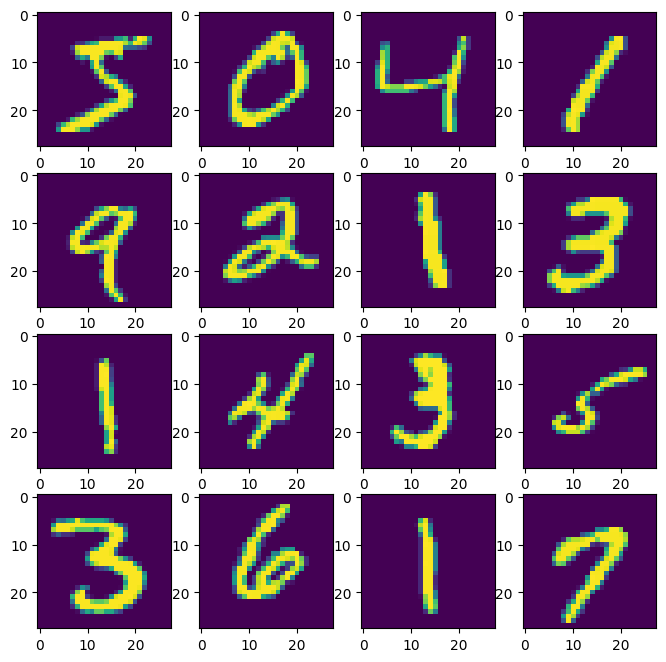

In [16]:
plt.figure(figsize=(8,8))
for i in range(16): 
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])

### Model Building

In [17]:
from tensorflow.keras.layers import Conv2D ,AveragePooling2D ,Flatten ,Dense,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

In [18]:
input_layer = Input(shape=(28,28,1))
model_layer = Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(28,28,1), padding='same')(input_layer) 
model_layer = AveragePooling2D()(model_layer)
model_layer = Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid')(model_layer)
model_layer = AveragePooling2D()(model_layer)
model_layer = Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid')(model_layer)
model_layer = Flatten()(model_layer)
model_layer = Dense(84, activation='tanh')(model_layer)
output = Dense(10, activation='softmax')(model_layer)

model = Model(input_layer,output)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120 

### Early Stopping Call Back

In [20]:
early_stopping  = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss' ,patience = 5
)

In [21]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test),callbacks = [early_stopping])

Epoch 1/50
938/938 [==============================] - 30s 29ms/step - loss: 0.2724 - accuracy: 0.9209 - precision: 0.9475 - recall: 0.8931 - val_loss: 0.1185 - val_accuracy: 0.9646 - val_precision: 0.9711 - val_recall: 0.9583
Epoch 2/50
938/938 [==============================] - 25s 26ms/step - loss: 0.0970 - accuracy: 0.9704 - precision: 0.9754 - recall: 0.9661 - val_loss: 0.0818 - val_accuracy: 0.9759 - val_precision: 0.9799 - val_recall: 0.9725
Epoch 3/50
938/938 [==============================] - 25s 27ms/step - loss: 0.0653 - accuracy: 0.9804 - precision: 0.9831 - recall: 0.9779 - val_loss: 0.0583 - val_accuracy: 0.9807 - val_precision: 0.9832 - val_recall: 0.9786
Epoch 4/50
938/938 [==============================] - 25s 26ms/step - loss: 0.0499 - accuracy: 0.9843 - precision: 0.9865 - recall: 0.9827 - val_loss: 0.0569 - val_accuracy: 0.9825 - val_precision: 0.9840 - val_recall: 0.9809
Epoch 5/50
938/938 [==============================] - 25s 26ms/step - loss: 0.0376 - accuracy: 0

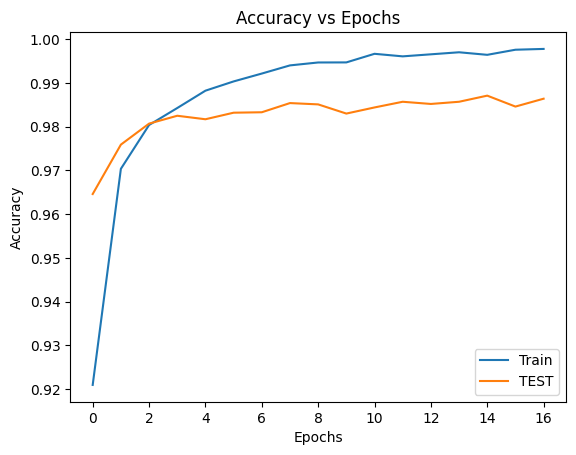

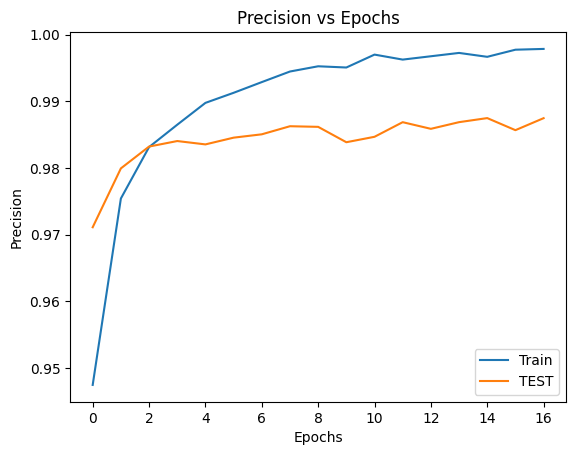

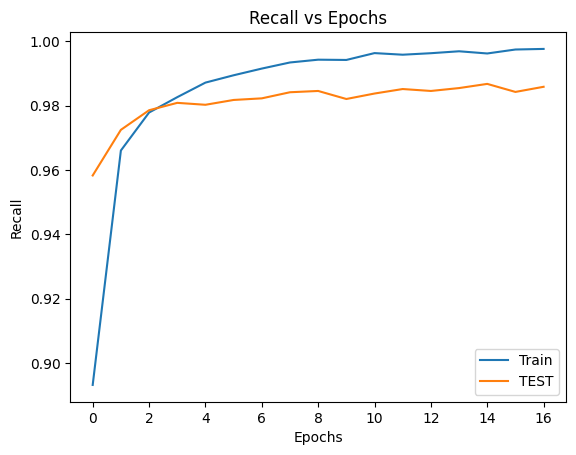

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'TEST'], loc = 'lower right')
plt.show()


plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Precision vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(['Train', 'TEST'], loc = 'lower right')
plt.show()


plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Train', 'TEST'], loc = 'lower right')
plt.show()

In [23]:
import numpy as np

In [24]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
true = np.argmax(y_test,axis = 1) 

313/313 [==============================] - 3s 7ms/step


### Confusion Matrix

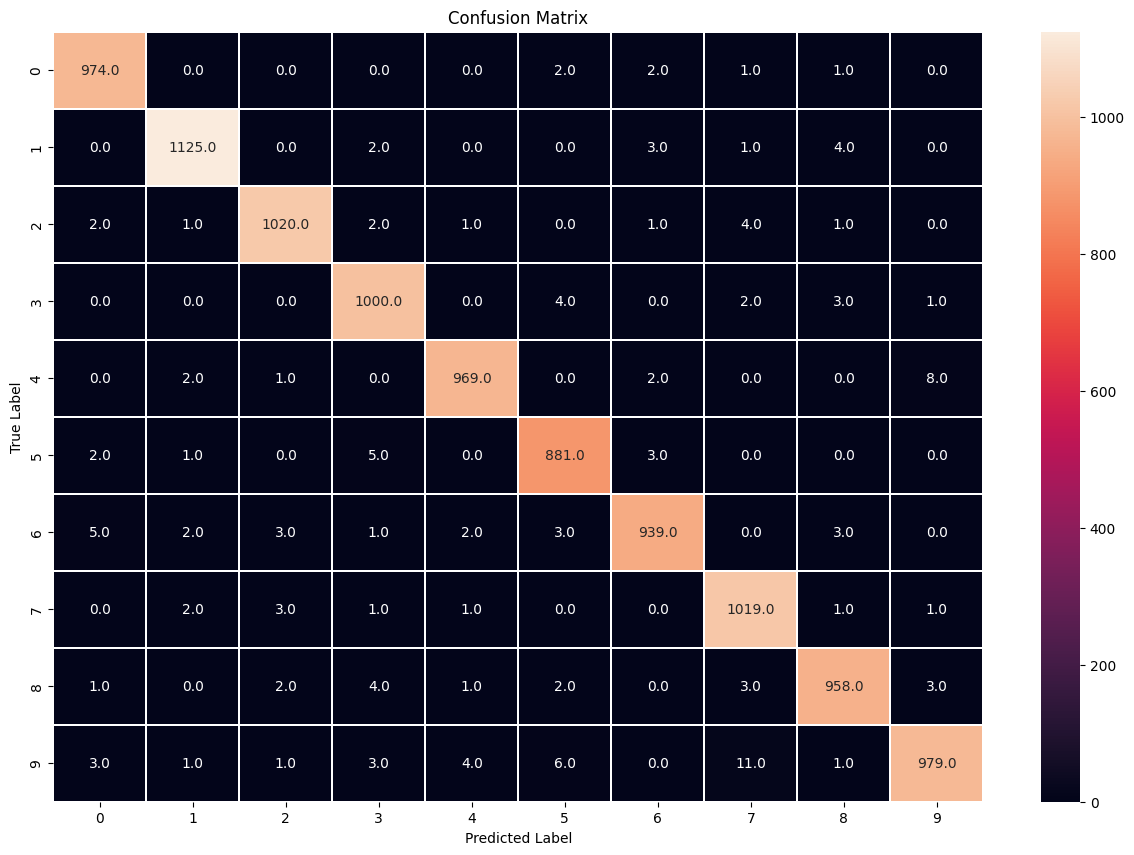

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true, pred) 
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True, linewidths=0.01, fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(true, pred,digits= 5))

              precision    recall  f1-score   support

           0    0.98683   0.99388   0.99034       980
           1    0.99206   0.99119   0.99163      1135
           2    0.99029   0.98837   0.98933      1032
           3    0.98232   0.99010   0.98619      1010
           4    0.99080   0.98676   0.98878       982
           5    0.98107   0.98767   0.98436       892
           6    0.98842   0.98017   0.98428       958
           7    0.97887   0.99125   0.98502      1028
           8    0.98560   0.98357   0.98458       974
           9    0.98690   0.97027   0.97851      1009

    accuracy                        0.98640     10000
   macro avg    0.98631   0.98632   0.98630     10000
weighted avg    0.98642   0.98640   0.98639     10000

